# 1. 기본 문법 익히기

In [1]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

> 이제 KNeighborsClassifier 모델을 생성해 보자. n_neighbors는 기본값이 5이다. 간단하게 실습할 데이터는 3개 임으로 3이하의 수를 입력해야 한다.

In [2]:
training_datas = [
    [0.5, 0.2, 0.1],
    [0.9, 0.7, 0.3],
    [0.4, 0.5, 0.7]
]

training_labels = [0, 1, 1]
knn.fit(training_datas, training_labels)

KNeighborsClassifier(n_neighbors=3)

> fit을 통해 모델을 생성할 수 있다.

In [3]:
test_datas = [
    [0.2, 0.1, 0.7],
    [0.3, 0.6, 0.7],
    [0.5, 0.4, 0.3]
]

pred = knn.predict(test_datas)
pred

array([1, 1, 1])

> 예측 결과 모든 값이 1로 나타났다. 이와 같이 KNN 알고리즘은 간단한 구조로 되어 있다.

# 2. 유방암 데이터 분석

> scikit-learn에 있는 유방암 데이터를 활용해 보자. 이 datasets에는 총 30개의 속성과 malignant(악성), benign(양성) 의 두가지 타겟값을 가지고 있다.

## 2.1 데이터 읽기

In [4]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
print(breast_cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
print(breast_cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
len(breast_cancer_data.data), len(breast_cancer_data.target)

(569, 569)

> 위와 같이 dict 형식으로 여러 정보들을 가지고 있다.

In [7]:
import pandas as pd 

df_data = pd.DataFrame(breast_cancer_data.data)
df_label = pd.DataFrame(breast_cancer_data.target)

> data는 종양관련 데이터 이고 target은 결과이며 target_name은 결과의 레이블이다.

## 2.2 데이터 정제

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

> 확인 결과 총 30개의 feature 정보가 float 형식으로 되어 있는 것을 볼 수 있다.

In [9]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


> 위의 정보를 보면 각 feature 별 데이터가 어떤 수는 1보다 큰 실수로 또 어떤 수는 1보다 작은 실수로 기준이 모호하게 되어 있다. 

In [10]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

> describe 확인 결과 결측치가 존재하지는 않는다.

## 2.3 정규화

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit_transform : fit 과 transform 을 둘다 실행한다.
data_scaled = scaler.fit_transform(df_data)
df_data_scaled = pd.DataFrame(data_scaled)
df_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [13]:
df_data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> 정규화 작업을 위해 MinMaxScaler클래스를 사용하였다. 현재 feature의 개수를 맞추기 위해 fit함수를 이용하여 데이터를 변환하기 위해 transform 함수를 이용한다. 이 두 가지는 항상 같이 동작시키기 때문에 두 기능을 합친 fit_transform 함수를 이용하였다. 이렇게 만들어진 데이터를 dataframe으로 변환한 후 head 및 describe로 0~1사이의 값으로 변환되었는지 확인하였다.

## 2.4 모델 만들기

### 2.4.1 데이터 분류

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data_scaled, df_label, test_size=0.2, random_state=10)

In [15]:
X_train.shape, y_train.shape

((455, 30), (455, 1))

In [16]:
import numpy as np 

np.ravel(y_train)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

### 2.4.2 모델 생성

> n_neighbors를 3으로 지정하면 근거리에 3개의 데이터를 확인하여 각 데이터를 분류하는 모델을 생성하게 된다.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# label 은 1차원이어야 한다.
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=3)

## 2.5 모델의 정확도(Accuracy) 평가하기

In [18]:
print(knn.score(X_test, np.ravel(y_test)))

0.9912280701754386


In [19]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_test)

print('정확도 : ', accuracy_score(y_test, pred))

정확도 :  0.9912280701754386


## 2.6 모델 튜닝하기

### 2.6.1 10단위 파라미터 지정

In [20]:
y_train.values.reshape(-1)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [21]:
knn = KNeighborsClassifier()

In [22]:
from sklearn.model_selection import GridSearchCV

def get_best_params(n_neighbor_list):
    params = {
        'n_neighbors':n_neighbor_list,
        'weights': ['uniform', 'distance'],
        'metric':['euclidean', 'manhattan', 'minkowski']
    }

    grid_cv = GridSearchCV(knn, param_grid=params, scoring='accuracy', cv=5)
    grid_cv.fit(X_train, y_train.values.reshape(-1))
    print('Best Score : ', grid_cv.best_score_)
    print('Best Hyper Parameters :', grid_cv.best_params_)

> * n_neighbors는 리스트로 받아 최적의 수치를 얻어 낼 것이다.
* Metric은 세 가지 중 하나가 선택될 것이다.
* Weights는 두 가지 중 하나가 선택될 것이다.

In [23]:
n_neighbor_list = range(1, 100, 10)
get_best_params(n_neighbor_list)

Best Score :  0.9626373626373625
Best Hyper Parameters : {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


### 2.6.2 에러처리

> 다음과 같이 경고가 나타나는 이유는 fit 적용 시 y_train이 1차원 배열로 적용되어야 하기 때문이다.
- /usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

> 확인 결과 타입은 dataframe이며 2차원 데이터를 가지고 있다.

### 2.6.3 3단위 리스트

In [24]:
n_neighbor_list = range(5, 17, 3)
get_best_params(n_neighbor_list)

Best Score :  0.9736263736263737
Best Hyper Parameters : {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}


> 실행 결과 n_neighbors가 11일 때 최고의 점수를 얻게 되었다. 조금 더 자세한 값을 얻기 위해 n_neighbors를 2 ~ 20 사이의 범위로 지정하여 결과를 확인해 보자.

> 범위를 줄여 11을 기준으로 6씩 가감하여 3씩 증가 시킨 결과 8이 최적의 값으로 나타났다.

### 2.6.4 1단위 리스트

In [25]:
n_neighbor_list = range(6, 11, 1)
get_best_params(n_neighbor_list)

Best Score :  0.9736263736263737
Best Hyper Parameters : {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}


In [26]:
n_neighbor_list = range(5, 8, 1)
get_best_params(n_neighbor_list)

Best Score :  0.9736263736263737
Best Hyper Parameters : {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}


> 마지막으로 8을 기준으로 2씩 가감하여 1씩 증가한 결과 다음과 같은 결과를 얻게 되었다.
* Best Score:  0.9692307692307691
* Best Hyper Parameter:  {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}

> 확인 결과 6, 8보다 작은 점수가 나타난 것을 볼 수 있다. 따라서 모델에 적용할 하이퍼 파라미터는 다음과 같이 적용할 수 있다.
- 'metric': 'euclidean'
- 'n_neighbors': 6
- 'weights': 'distance'

> n_neighbors가 너무 작게 되면 이상치 처리에 문제게 될 수 있으나 너무 크게 되면 오랜 시간이 걸릴 수 있어 적당한 수치를 선택하여 사용하면 된다.

## 2.7 최적화 적용

### 2.7.1 모델 생성

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')
knn.fit(X_train, np.ravel(y_train))
round(knn.score(X_test, np.ravel(y_test)),2)

1.0

> 

### 2.7.2 한글 설정

In [28]:
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname=r'c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [29]:
fm_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
fm_list

['C:\\Windows\\Fonts\\constanz.ttf',
 'C:\\Windows\\Fonts\\FRABKIT.TTF',
 'C:\\Windows\\Fonts\\comici.ttf',
 'C:\\Windows\\Fonts\\calibril.ttf',
 'C:\\Windows\\Fonts\\SitkaVF-Italic.ttf',
 'C:\\Windows\\Fonts\\POORICH.TTF',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\Windows\\Fonts\\gadugib.ttf',
 'C:\\Windows\\Fonts\\seguihis.ttf',
 'C:\\Windows\\Fonts\\mvboli.ttf',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\Windows\\Fonts\\HMKMAMI.TTF',
 'C:\\Windows\\Fonts\\REFSAN.TTF',
 'C:\\Windows\\Fonts\\corbelb.ttf',
 'C:\\Windows\\Fonts\\ntailu.ttf',
 'C:\\Windows\\Fonts\\mmrtextb.ttf',
 'C:\\Windows\\Fonts\\corbelli.ttf',
 'C:\\Windows\\Fonts\\SegoeIcons.ttf',
 'C:\\Windows\\Fonts\\ROCC____.TTF',
 'C:\\Windows\\Fonts\\GIL_____.TTF',
 'C:\\Windows\\Fonts\\IMPRISHA.TTF',
 'C:\\Windows\\Fonts\\ARIALN.TTF',
 'C:\\Windows\\Fonts\\LEELAWAD.TTF',
 'C:\\Windows\\Fonts\\BERNHC.TTF',
 'C:\\Windows\\Fonts\\Candaral.ttf',
 'C:\\Windows\\Fonts\\ROCKEB.TTF',
 'C:\\Windows\\Fonts\\calibrib.ttf',
 'C:\\Windows

### 2.7.3 그래프 그리기

In [30]:
df_data_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


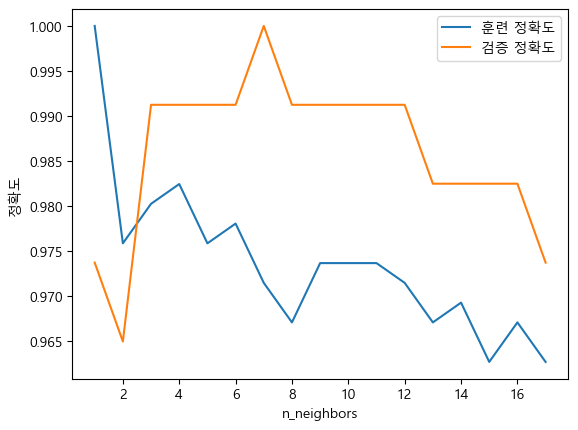

In [31]:
training_accuracy = []
test_accuracy = []
n_neighbors_settings = range(1, 18)

for n_neighbor in n_neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train.values.reshape(-1))
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(n_neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(n_neighbors_settings, test_accuracy, label='검증 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

> 실행 결과 앞 부분이 높은 수치를 포현하고 있지만 훈련데이터에 너무 치중되어 나타난다. 테스트 데이터는 13부터 안정적으로 나타나며 훈련데이터와 테스트데이터가 골고루 정확도가 높은 14가 최적의 파라미터가 될 수 있다.

# 3. 모델 저장하기

## 3.1 메모리에 저장하기

In [32]:
import pickle

saved_model = pickle.dumps(knn)

In [33]:
knn.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0])

In [34]:
knn_in_memory = pickle.loads(saved_model)
knn_in_memory.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0])

## 3.2 파일에 저장하기

In [35]:
import joblib

save_model_filepath = 'model/breast_cancer_v1.pkl'
joblib.dump(knn, save_model_filepath)

['model/breast_cancer_v1.pkl']